<a href="https://colab.research.google.com/github/daisy-rivera/Cost-of-Undergraduate-Tuition/blob/main/Cost_of_Undergraduate_Tuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Average Cost of Undergraduate Student by State (USA)

##Data Description

- This data is posted on Kaggle and was gathered from the National Center for Education Statistics Annual Digest who publishes an annual Digest of Education Statistics report which includes data regarding education in the U.S. 
- It includes information on the average cost of college in the United States, by state and type of institution from 2013 thru 2021.

###Link to datasource [Here](https://www.kaggle.com/datasets/bhargavchirumamilla/average-cost-of-undergraduate-student-by-state-usa)


##Task

- This database will help students predict the average cost for Undergraduate school by state and help them make what is probably one of the biggest investments of their life.

##Import Libraries

In [1]:
# Pandas
import pandas as pd
# Numpy
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

## Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

##Function

In [2]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics for a model
def model_metrics(pipe, X_train, y_train, X_test, y_test, 
                       model_name='Regression Model', ):
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)
  
  metrics = ['train_MAE','test_MAE', 
             'train_RMSE', 'test_RMSE', 
             'train_R2', 'test_R2']
  
  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),7)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),7)

  ## Output Dataframe
  scores = pd.DataFrame(index=metrics, columns=[f'{model_name}_test'])
  scores.loc[metrics, f'{model_name}_test'] = [train_mae, test_mae,
                                               train_rmse, test_rmse,
                                               train_r2, test_r2]

  return scores

##Import Data

In [3]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filename = '/content/drive/MyDrive/Coding Dojo/Stack 2 - Machine Learning/08 Wk 8 Boosting/Data Files/average  cost of undergradschool.xlsx'
df = pd.read_excel(filename)

#displaying first 5 rows
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


##Inspecting Data

In [5]:
#verifying how many rows/columns, datatypes, missing items and duplicate rows
print(df.info())
print(('-'*30))
print(f'There are {df.duplicated().sum()} duplicate rows.')
print(('-'*30))
print(f'There are {df.isna().sum().sum()} missing values.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB
None
------------------------------
There are 0 duplicate rows.
------------------------------
There are 0 missing values.


In [6]:
#show # of rows & columns
df.shape

print(f'- There are {df.shape[0]} rows, and {df.shape[1]} columns.')

#what rows and columns represent
print(f'- The rows represent {df.shape[0]} students, and the columns represent {df.shape[1]-1} features and 1 target variable.')

- There are 3548 rows, and 6 columns.
- The rows represent 3548 students, and the columns represent 5 features and 1 target variable.


In [7]:
#checking for outliers and impossible values
df.describe()

,Year,Value
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [8]:
df.describe(exclude='number')

,State,Type,Length,Expense
count,3548,3548,3548,3548
unique,51,3,2,2
top,Alabama,Public Out-of-State,4-year,Fees/Tuition
freq,71,1347,2672,2198


In [9]:
#creating a list of object columns
object_list = list(df.select_dtypes(include='object'))
object_list

['State', 'Type', 'Length', 'Expense']

In [10]:
#looping thru object columns to verify inconsistencies and how many categories in each
for each in object_list:
  print(f'Column Name:{each}')
  print(df[each].value_counts())
  print('\n')


Column Name:State
Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa      

##Data Cleaning

- There are no missing rows and no duplicates.
- All datatypes look correct.
- There are no unusual or outlier values.
- Will treat 'year' column as a categorical value and OneHotEncode it.
- Will OneHotCode all Categorical columns

##Copy of df

In [131]:
#make copy of df for machine learning
mldf = df.copy()

##Exploratory Data Analysis

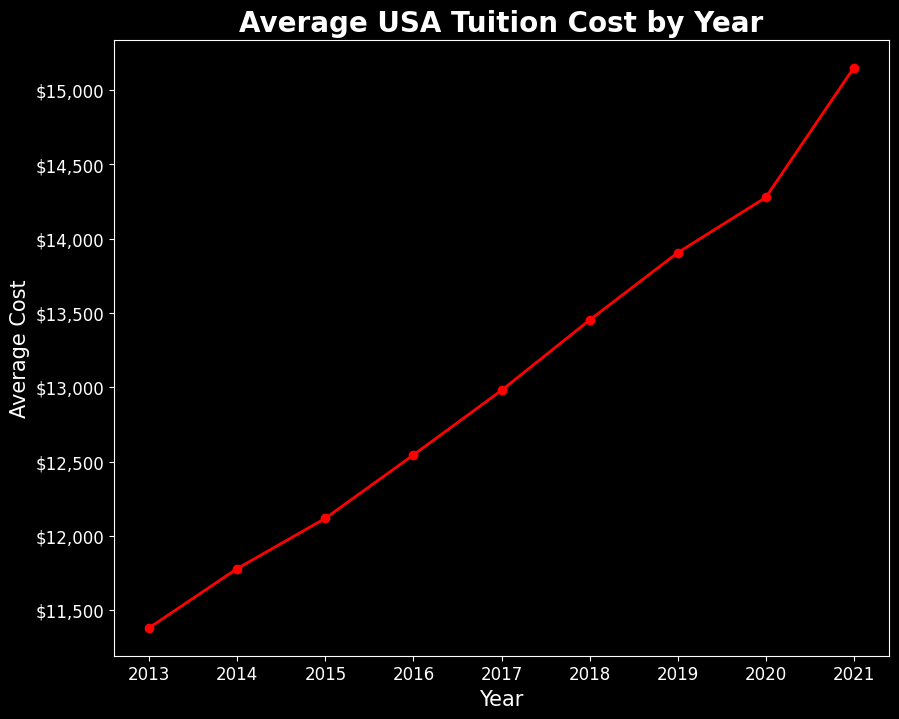

In [132]:
#setting matplotlib style
plt.style.use('dark_background')

#filter for average cost per year
year_average = df.groupby('Year')['Value'].mean().round(2)

#plotting line graph
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(year_average.index, year_average.values, marker='.',linewidth=2, markersize=12, color='red')
plt.title('Average USA Tuition Cost by Year', fontsize=20, fontweight='bold')
plt.ylabel('Average Cost',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)
ax.yaxis.set_major_formatter('${x:,.0f}');

> The data clearly shows that the average cost of tuition is increasing year by year. We can confidently conclude that the cost of tuition will continue to rise in the upcoming years.

In [133]:
#creating filter for Yearly cost by expense
year_average_exp = df.groupby(['Year','Expense']).mean().round(2).reset_index()
year_average_exp.head(4)

,Year,Expense,Value
0,2013,Fees/Tuition,12630.67
1,2013,Room/Board,9278.98
2,2014,Fees/Tuition,13087.60
3,2014,Room/Board,9578.55


In [134]:
#creating filter to split Expense by Fees/Tuition and Room/Board
Fee_Tui = year_average_exp['Expense'] == 'Fees/Tuition'
Rm_Brd = year_average_exp['Expense'] == 'Room/Board'
year_fee_tui = year_average_exp[Fee_Tui].groupby('Year')['Value'].mean().round(2)
year_rm_brd = year_average_exp[Rm_Brd].groupby('Year')['Value'].mean().round(2)

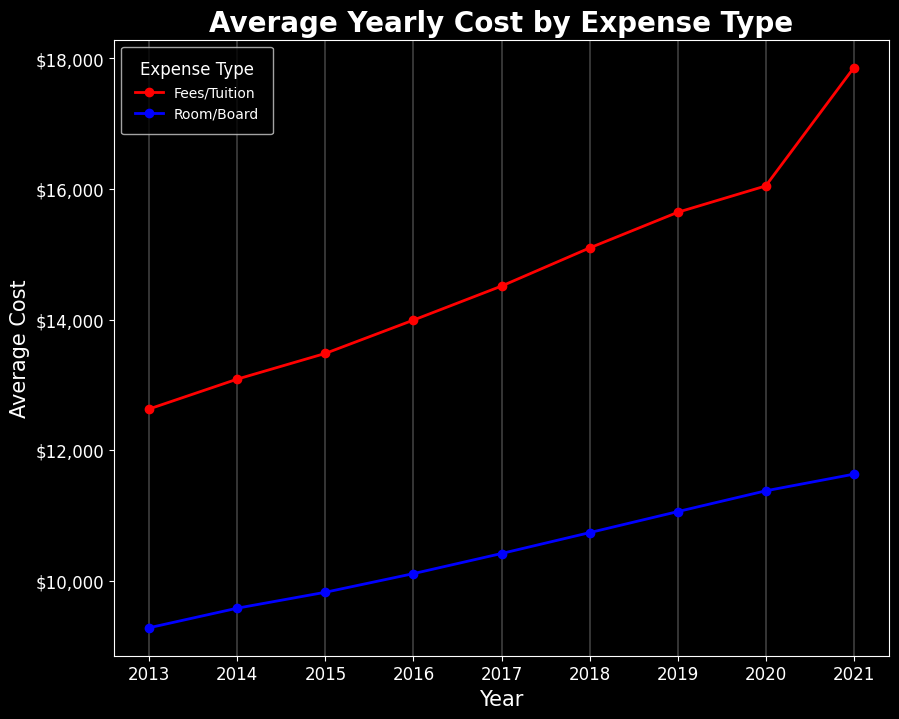

In [135]:
#plotting line graph
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(year_fee_tui.index, year_fee_tui.values, marker='.',linewidth=2, markersize=12, color='red')
plt.plot(year_rm_brd.index, year_rm_brd.values, marker='.',linewidth=2, markersize=12, color='blue')
plt.title('Average Yearly Cost by Expense Type', fontsize=20, fontweight='bold')
plt.ylabel('Average Cost',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(axis='x',linewidth=.3)
ax.legend(['Fees/Tuition', 'Room/Board'],borderpad=1,title='Expense Type',title_fontsize='large')
ax.yaxis.set_major_formatter('${x:,.0f}');

> This graph shows the average cost increase since 2013 by Expense Type. Both expenses are rising year over year. We can see that from 2020 to 2021, the cost of Fees/Tuition had a higher spike increase than in prior years.

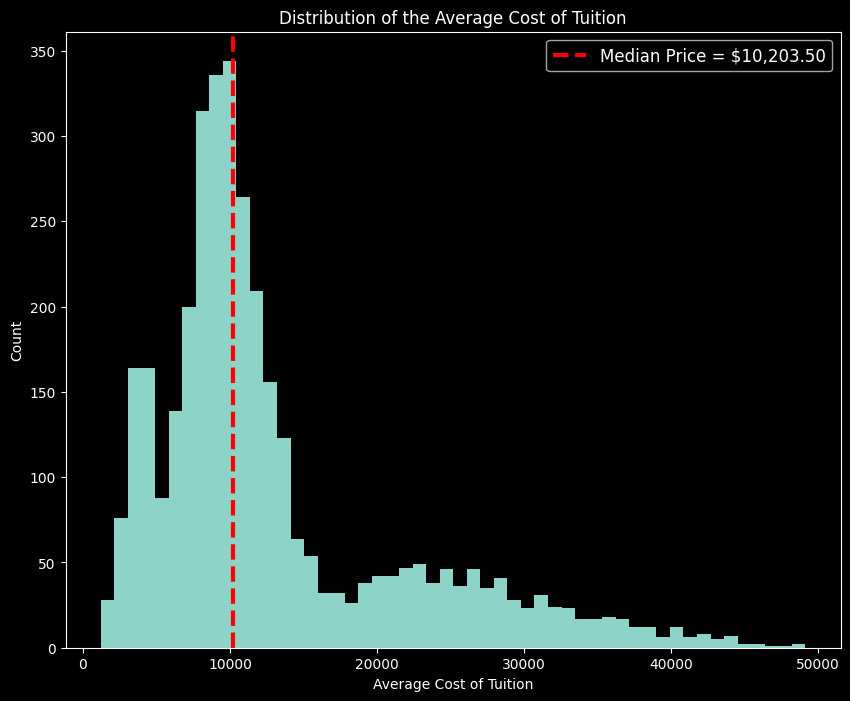

In [136]:
#setting the figure size
fig, ax = plt.subplots(figsize = (10,8))

#creating the histogram
ax.hist(df['Value'], bins = 'auto'); 

#customizing the graph
plt.xlabel('Average Cost of Tuition')
plt.ylabel('Count')
plt.title('Distribution of the Average Cost of Tuition')

#creating a median line on the graph
median = df['Value'].median().round(2) # getting the median line

#code to add line and customize it on the graph
plt.axvline(median, color = 'red', ls = '--', label = f'Median Price = ${median:,.2f}',lw=3)
plt.legend(fontsize=12,loc='upper right');


> We can see that the majority of the students in this dataset had an average cost of tuition of around $8-12K.

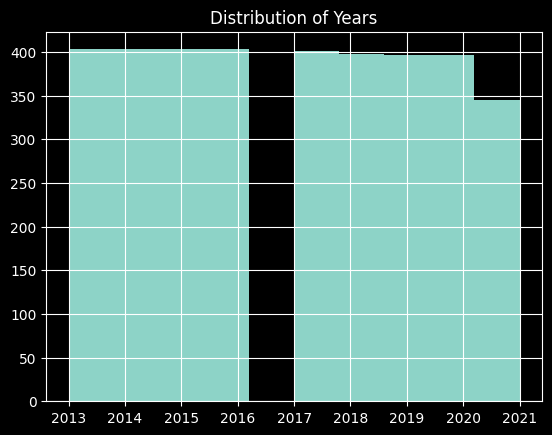

In [137]:
#distribution of years
df['Year'].hist()
plt.title('Distribution of Years');

> The distribution of years is pretty balanced.


 State 



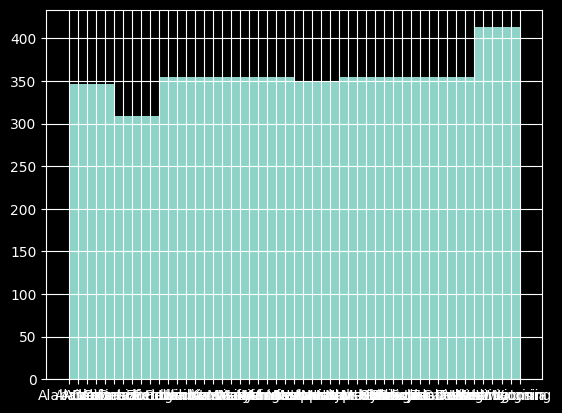


 Type 



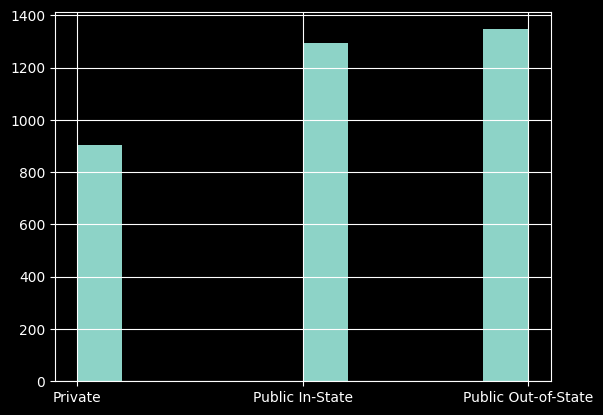


 Length 



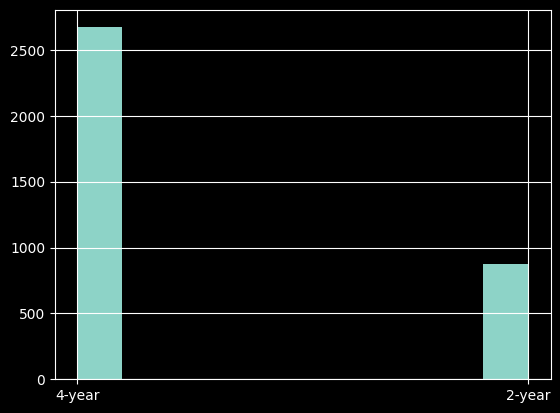


 Expense 



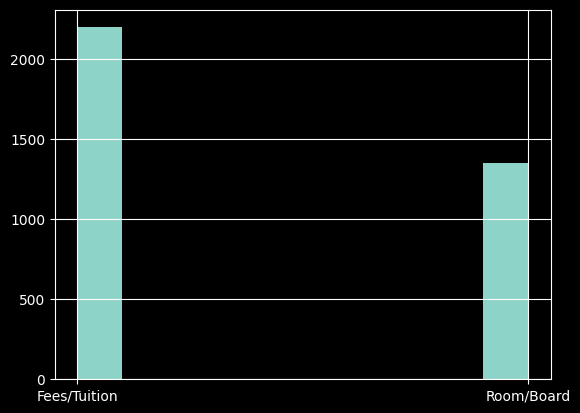

In [138]:
#Checking distribution for object columns
for col in df.select_dtypes('object'):
  print('\n',col,'\n')
  df[col].hist()
  plt.show()

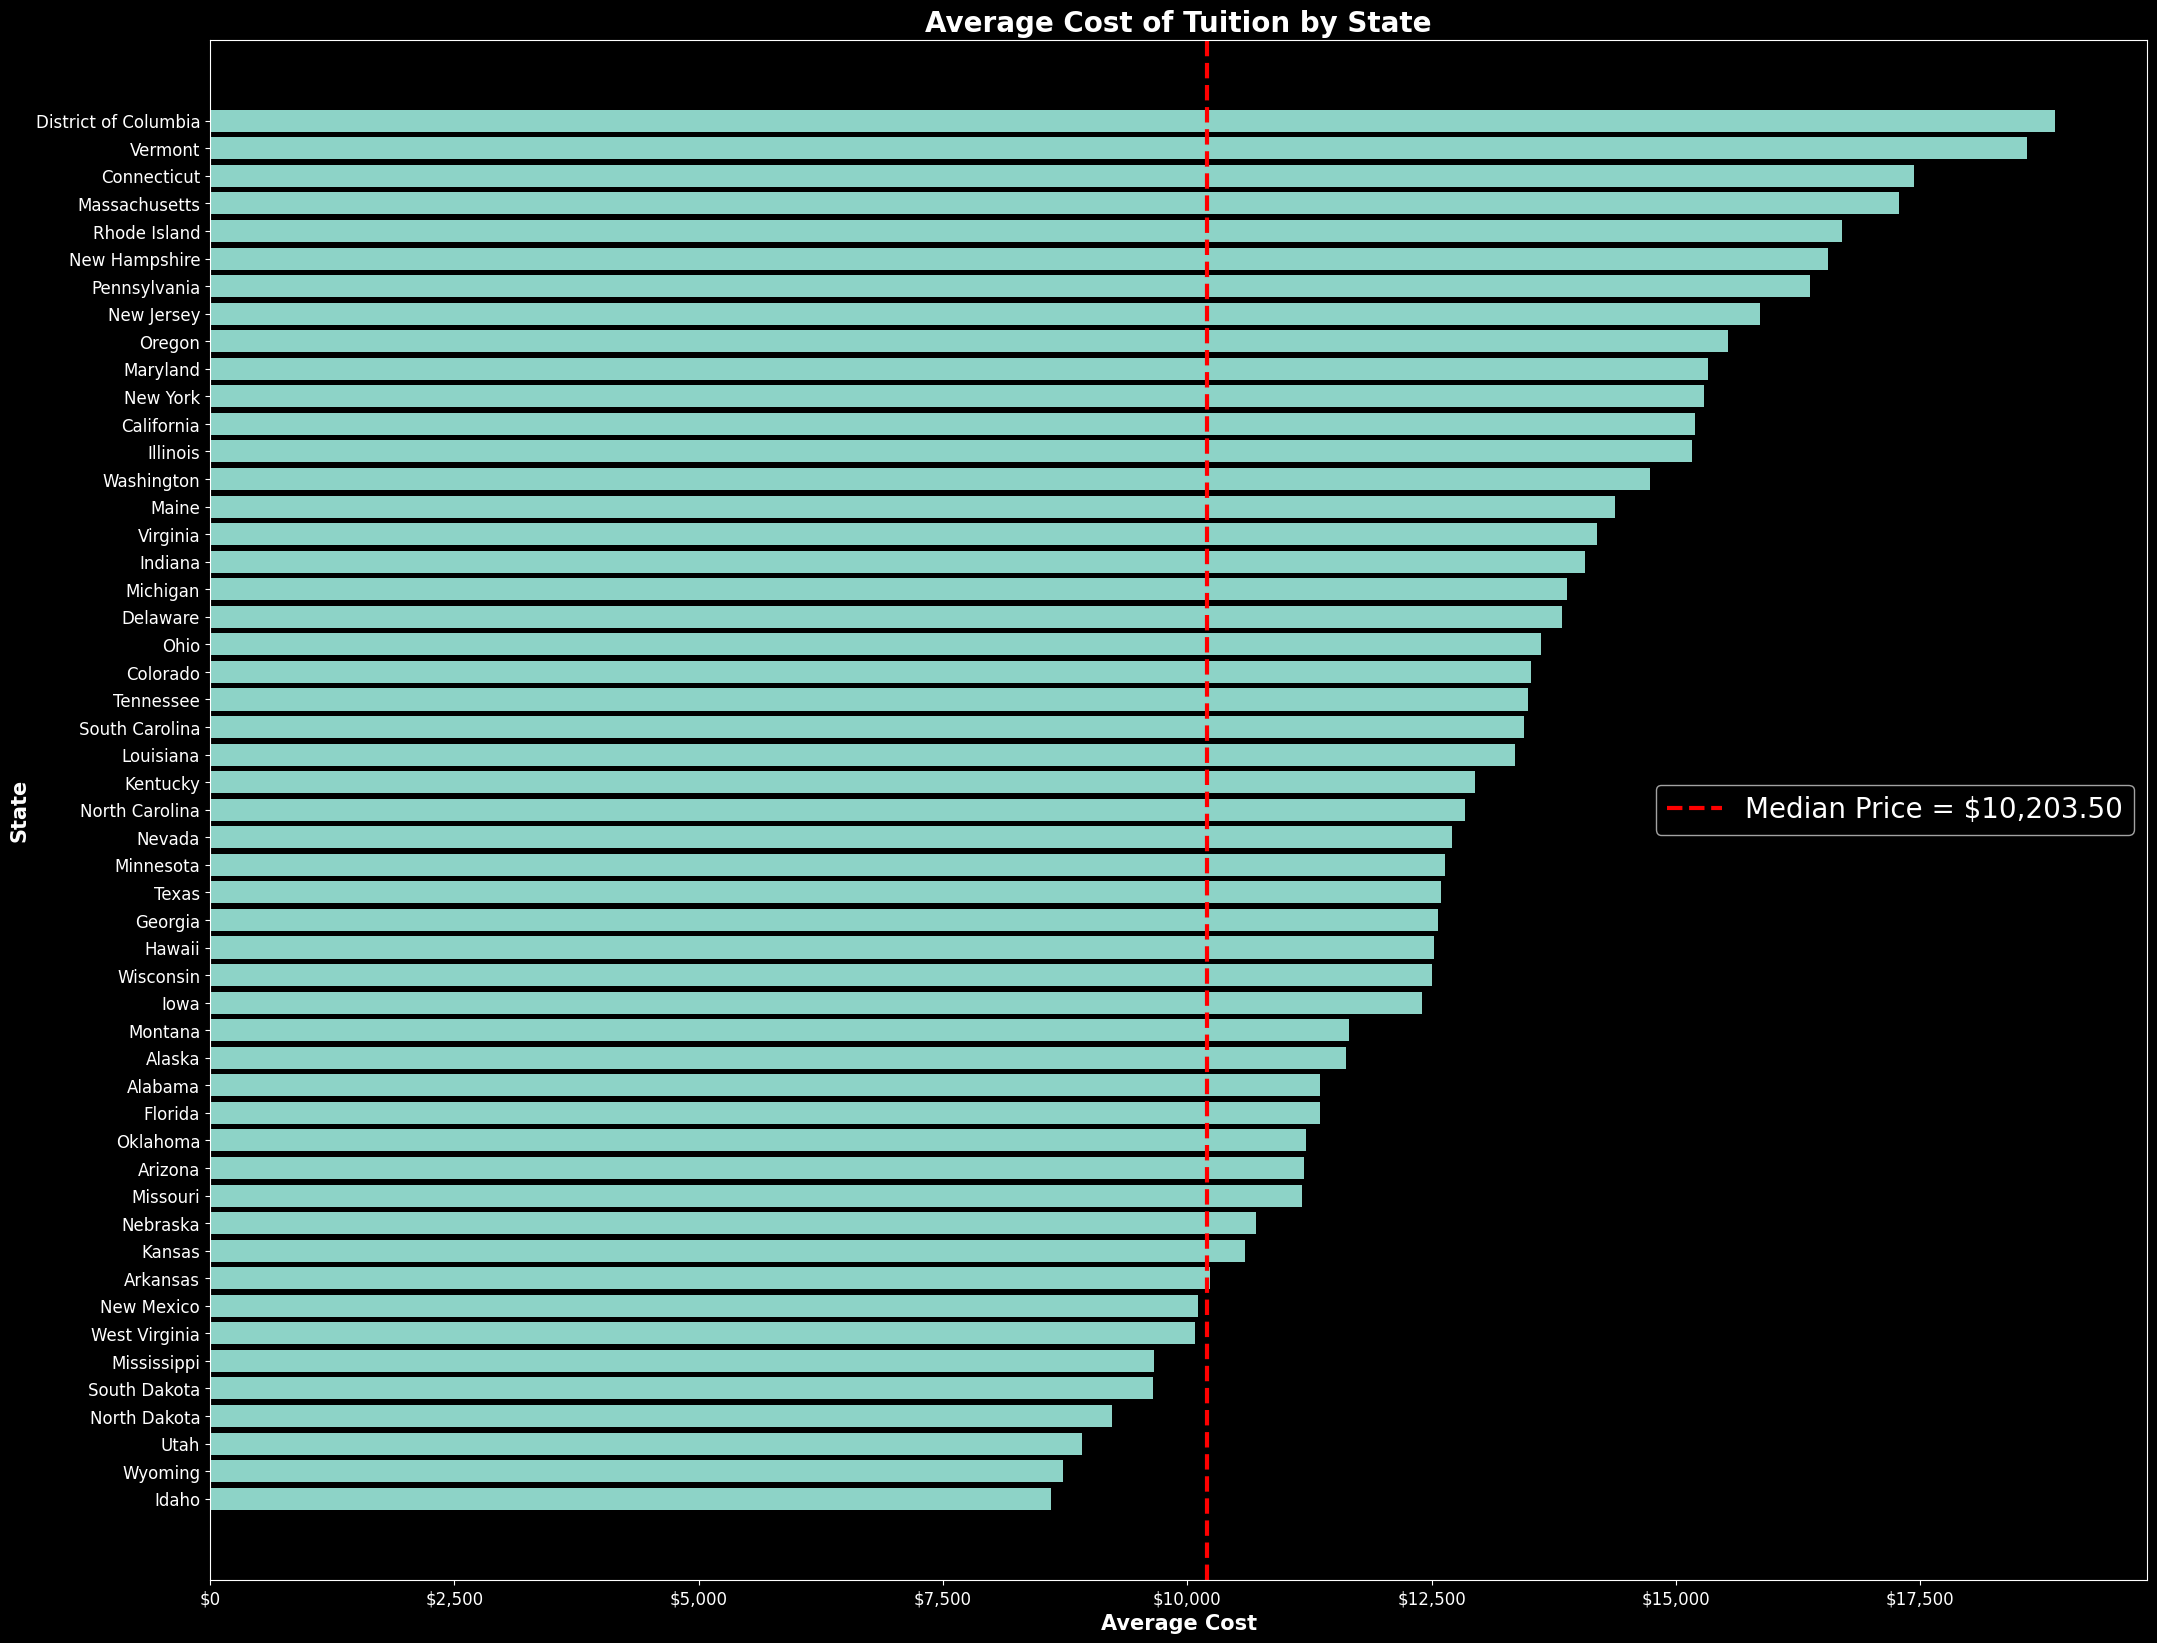

In [139]:
#filtering and sorting average cost by state
state_value = df.groupby('State')['Value'].mean().sort_values()

#plotting bar graph
fig, ax = plt.subplots(figsize=(25,20))
plt.barh(state_value.index, state_value.values)
plt.title('Average Cost of Tuition by State', fontsize=20, fontweight='bold')
plt.ylabel('State',fontsize=15,fontweight='bold')
plt.xlabel('Average Cost',fontsize=15,fontweight='bold')
plt.xticks(size=12)
plt.yticks(size=12)
ax.xaxis.set_major_formatter('${x:,.0f}');

#code to add line and customize it on the graph
plt.axvline(median, color = 'red', ls = '--', label = f'Median Price = ${median:,.2f}',lw=3)

plt.legend(fontsize=20,loc='center right');


> When we plot the average cost by state, we can see that the majority of the states are above the Median cost. Only 8 states have an average tuition below the Median cost. The 5 

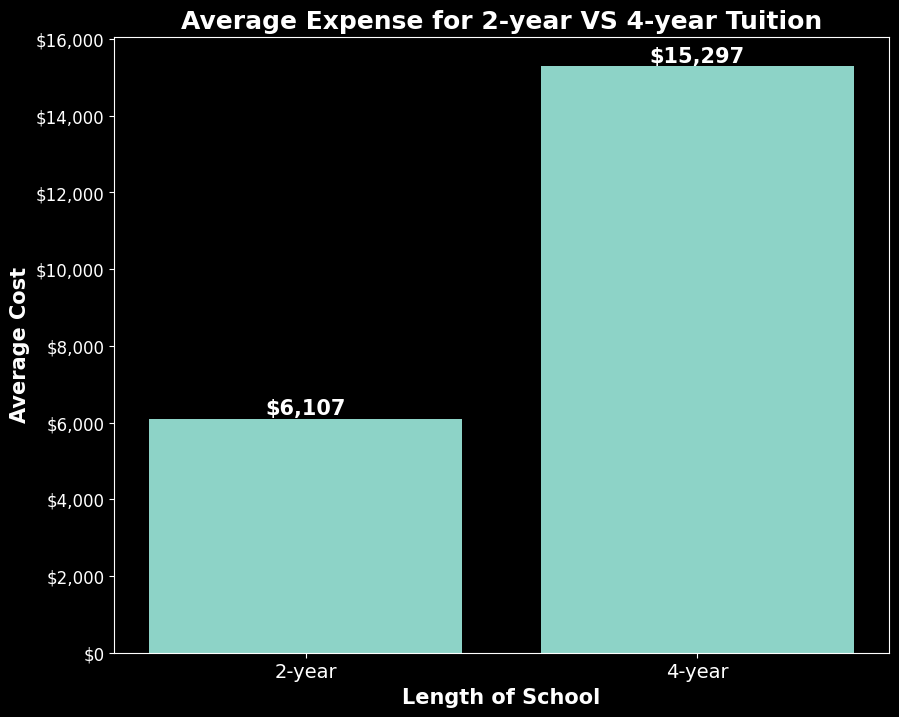

In [140]:
#filter for average cost by expense category
lengh_type = exp_type = df.groupby('Length')['Value'].mean()

#plotting bar graph
fig, ax = plt.subplots(figsize=(10,8))
exp_container = ax.bar(lengh_type.index, lengh_type.values)
ax.bar_label(exp_container, fmt='${:,.0f}',size=15, color='white', fontweight='bold')
plt.title('Average Expense for 2-year VS 4-year Tuition', fontsize=18, fontweight='bold')
plt.ylabel('Average Cost',fontsize=15,fontweight='bold')
plt.xlabel('Length of School',fontsize=15,fontweight='bold')
plt.xticks(size=14)
plt.yticks(size=12)
ax.yaxis.set_major_formatter('${x:,.0f}');

> The average cost of a 4-year tuition is slightly more than double of a 2-year tuition. 

In [141]:
#creating filters for length 
df2y = df[df['Length'] == "2-year"]
df4y = df[df['Length'] == "4-year"]

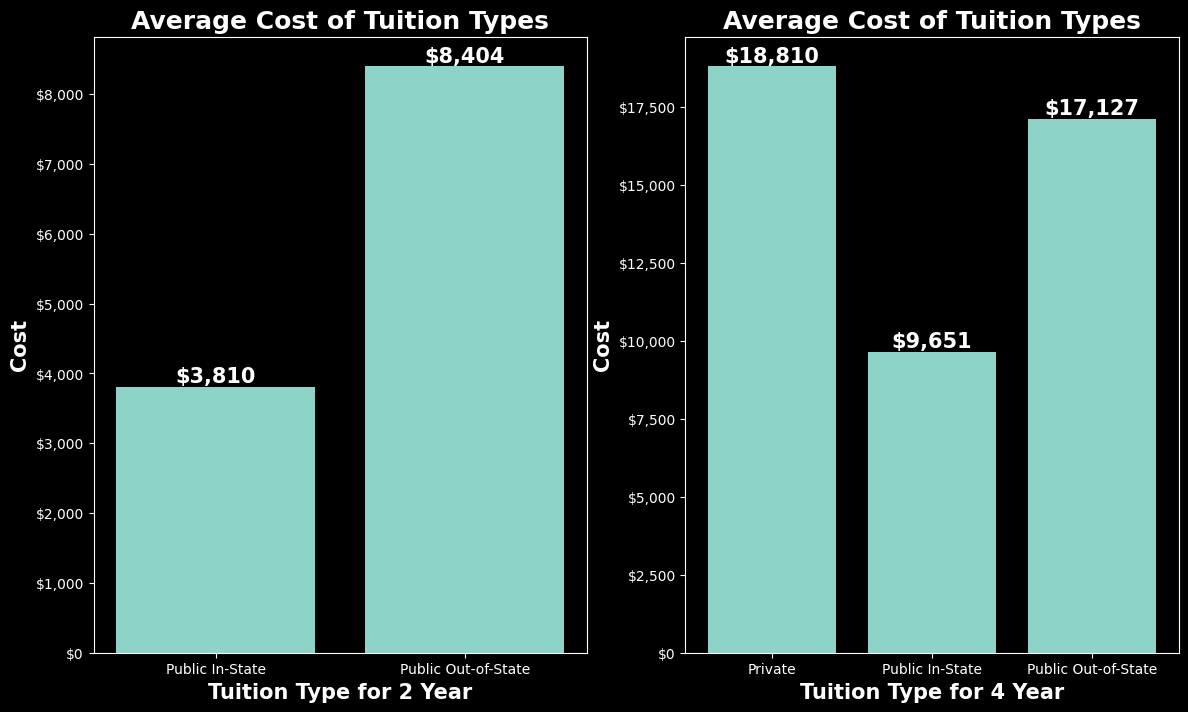

In [142]:
# #filter for average cost by expense category
type = df2y.groupby('Type')['Value'].mean()
type2 = df4y.groupby('Type')['Value'].mean()


#plotting bar graph
fig, ax = plt.subplots(1,2,figsize=(14,8))
type_container = ax[0].bar(type.index, type.values)
type2_container = ax[1].bar(type2.index, type2.values)
ax[0].bar_label(type_container,size=15, color='white', fontweight='bold',fmt='${:,.0f}')
ax[1].bar_label(type2_container,size=15, color='white', fontweight='bold',fmt='${:,.0f}')

ax[0].set_title('Average Cost of Tuition Types', fontsize=18, fontweight='bold')
ax[0].set_ylabel('Cost',fontsize=15,fontweight='bold')
ax[0].set_xlabel('Tuition Type for 2 Year',fontsize=15,fontweight='bold')
ax[0].yaxis.set_major_formatter('${x:,.0f}');

ax[1].set_title('Average Cost of Tuition Types', fontsize=18, fontweight='bold')
ax[1].set_ylabel('Cost',fontsize=15,fontweight='bold')
ax[1].set_xlabel('Tuition Type for 4 Year',fontsize=15,fontweight='bold')
ax[1].yaxis.set_major_formatter('${x:,.0f}');

> This database has a much higher count for Public Undergrad tuitions verses Private but either way it is clear that Public In-State is the most economic type of tuition. There is no Private tuition reported for 2-year length.

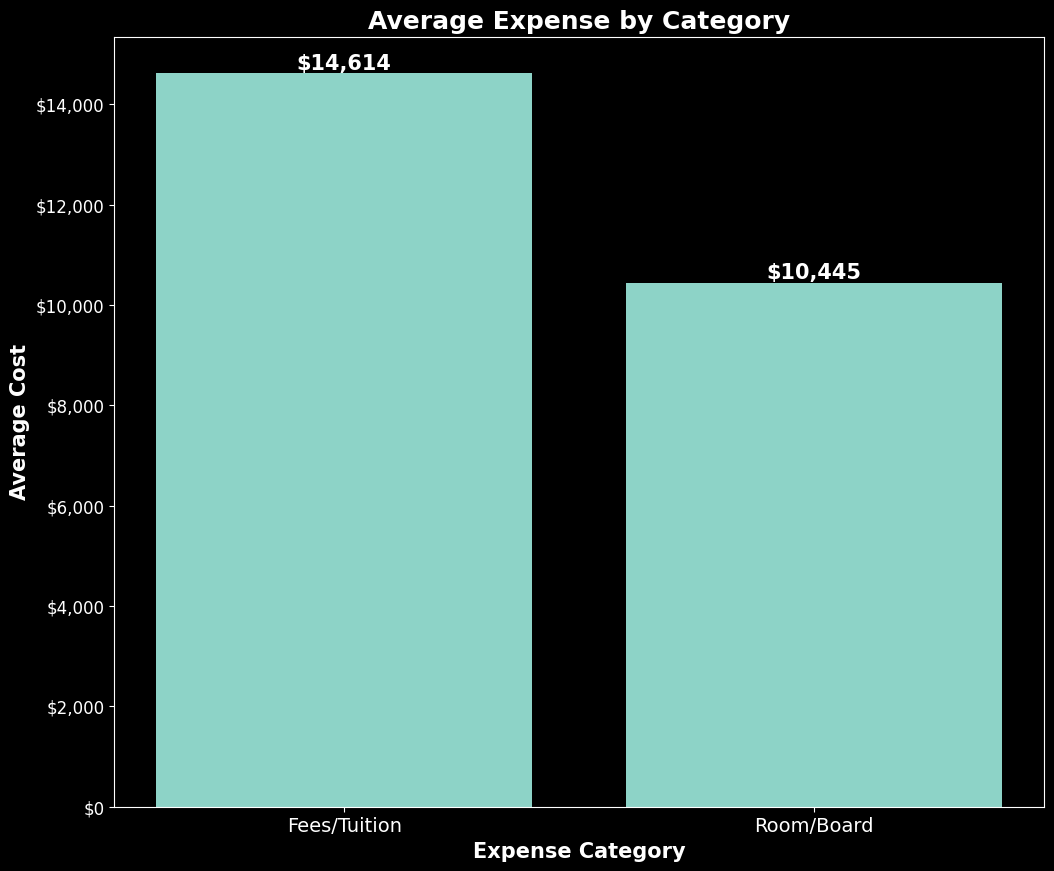

In [143]:
#filter for average cost by expense category
exp_type = df.groupby('Expense')['Value'].mean()

#plotting bar graph
fig, ax = plt.subplots(figsize=(12,10))
exp_container = ax.bar(exp_type.index, exp_type.values)
ax.bar_label(exp_container, fmt='${:,.0f}',size=15, color='white', fontweight='bold')
plt.title('Average Expense by Category', fontsize=18, fontweight='bold')
plt.ylabel('Average Cost',fontsize=15,fontweight='bold')
plt.xlabel('Expense Category',fontsize=15,fontweight='bold')
plt.xticks(size=14)
plt.yticks(size=12)
ax.yaxis.set_major_formatter('${x:,.0f}');

> The average expense by category shows that Room/Board is actually cheaper than the Fees and Tuition. However, a student can save a huge amount of Tuition if they can find ways to save on the Room/Board expenses.

In [144]:
Tuition_ExpType = df.groupby(['Type','Expense']).mean().reset_index()
Tuition_ExpType = Tuition_ExpType.sort_values(by = 'Value')
Tuition_ExpType

,Type,Expense,Year,Value
2,Public In-State,Fees/Tuition,2016.724586,6317.919622
3,Public In-State,Room/Board,2017.000000,10231.495556
5,Public Out-of-State,Room/Board,2017.000000,10231.495556
1,Private,Room/Board,2017.000000,10871.720000
4,Public Out-of-State,Fees/Tuition,2016.967670,16327.268673
0,Private,Fees/Tuition,2016.978022,26662.002198


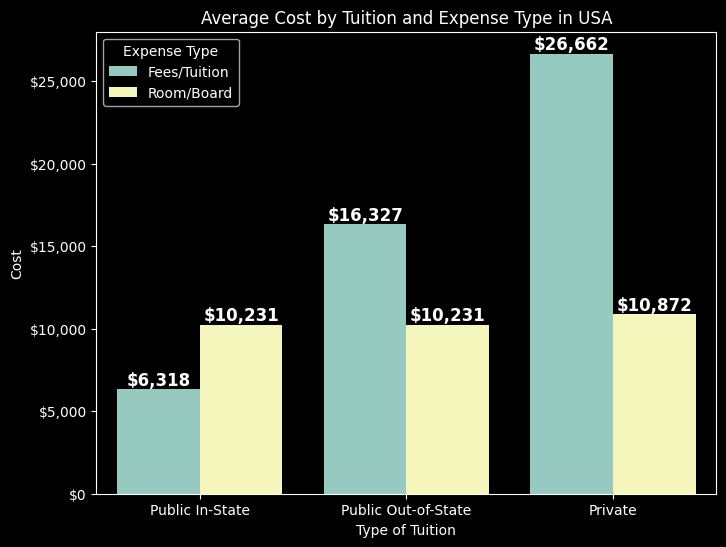

In [145]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(data = Tuition_ExpType, x = 'Type', y = 'Value', hue = 'Expense')
plt.bar_label(ax.containers[0], fmt='${:,.0f}',size=12, color='white', fontweight='bold')
plt.bar_label(ax.containers[1], fmt='${:,.0f}',size=12, color='white', fontweight='bold')

plt.title('Average Cost by Tuition and Expense Type in USA')
plt.ylabel('Cost')
plt.xlabel('Type of Tuition')
ax.yaxis.set_major_formatter('${x:,.0f}');
plt.legend(title='Expense Type');




- This graph shows the expense by type (Fees/Tuition vs Room/Board) by the type of Tuition (Public In-State, Public Out-of-State or Private). We can see by this graph that Room/Board costs are pretty similar for all types of Tuition. It is the Fees/Tuition expenses that largely differ based on the Type of Tuition.

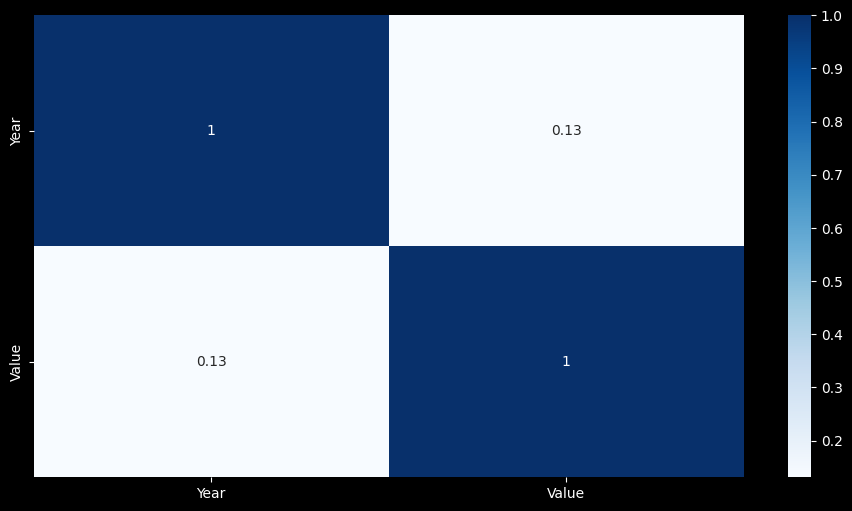

In [146]:
#creating a heat map
plt.figure(figsize=(11.45,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

- There are no correlations between my two numeric columns. I only the year column and my target column which is the Value.

In [147]:
#Filter for Top5
DisC = df['State'] == 'District of Columbia'
Ver = df['State'] == 'Vermont'
Mass = df['State'] == 'Massachusetts'
Conn = df['State'] == 'Connecticut'
RI = df['State'] == 'Rhode Island'

Top5 = (df[(DisC) | (Ver)| (Mass)| (Conn)| (RI)])
Top5_ExpType = Top5.groupby(['State','Expense']).mean().reset_index()
Top5_ExpType = Top5_ExpType.sort_values(by = 'Value')
Top5_ExpType

,State,Expense,Year,Value
9,Vermont,Room/Board,2017.000000,11884.740741
7,Rhode Island,Room/Board,2017.000000,12482.888889
1,Connecticut,Room/Board,2017.000000,13107.740741
5,Massachusetts,Room/Board,2017.000000,13151.555556
3,District of Columbia,Room/Board,2017.000000,15062.000000
6,Rhode Island,Fees/Tuition,2016.909091,19290.227273
4,Massachusetts,Fees/Tuition,2016.909091,19816.750000
0,Connecticut,Fees/Tuition,2016.909091,20090.704545
2,District of Columbia,Fees/Tuition,2016.846154,20201.884615
8,Vermont,Fees/Tuition,2016.909091,22715.068182


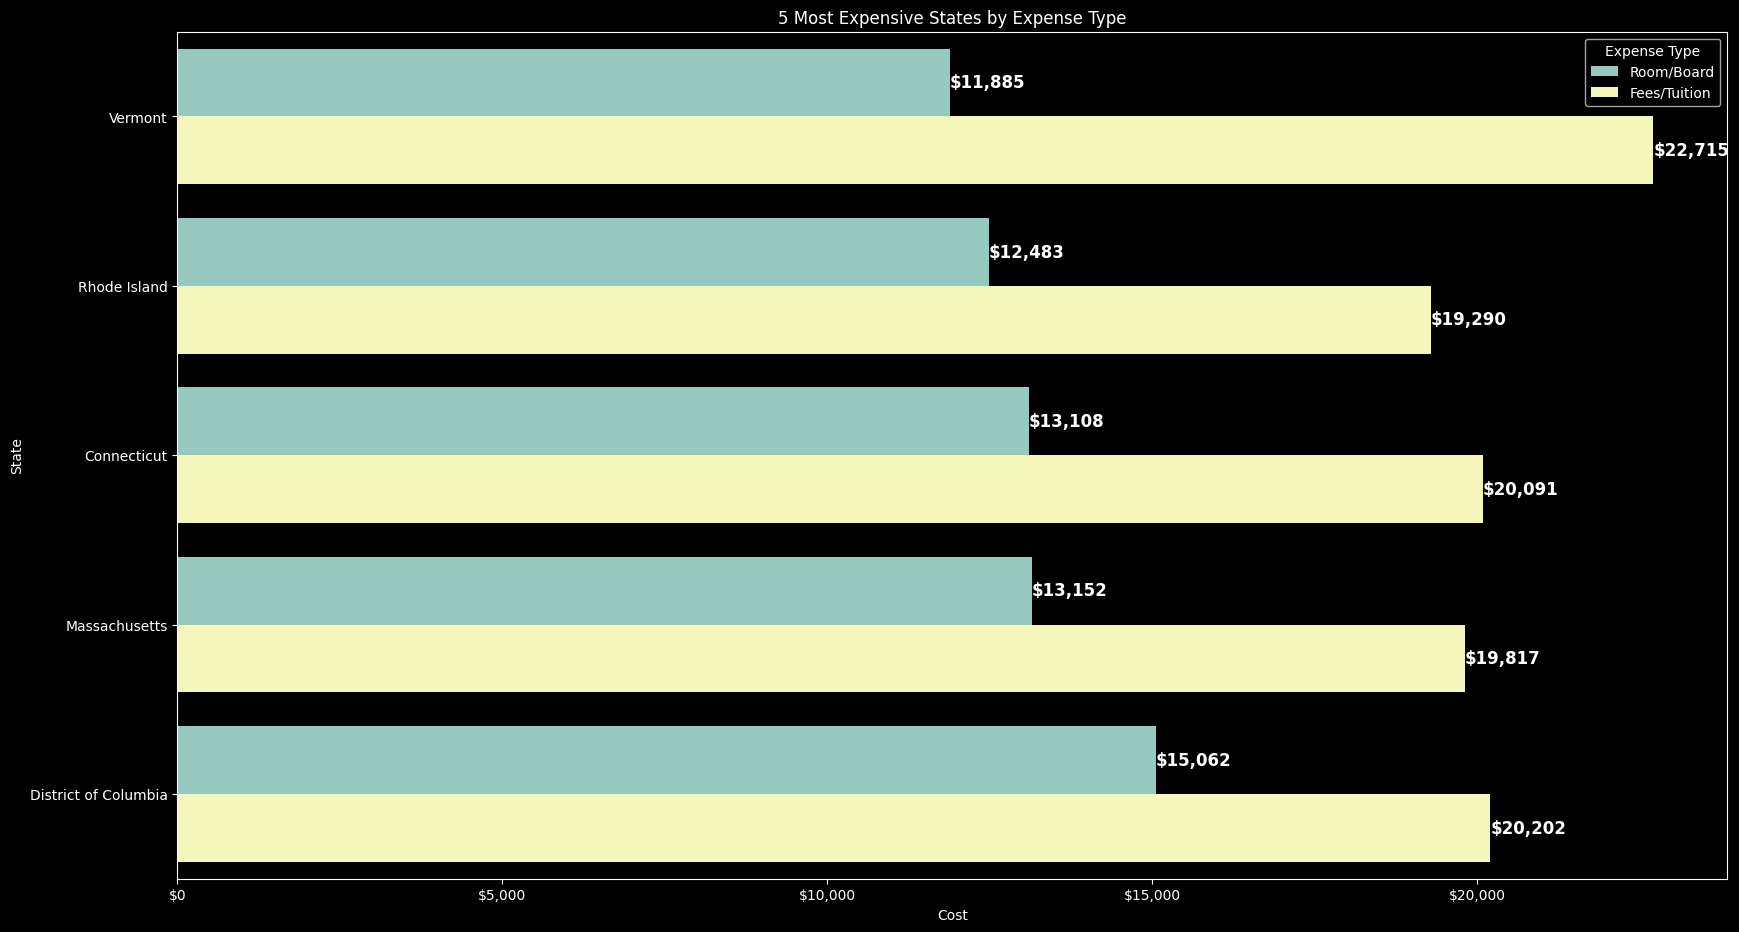

In [148]:
#plotting top 5
fig, ax = plt.subplots(figsize=(20,11))
ax = sns.barplot(data = Top5_ExpType, x = 'Value', y = 'State', hue = 'Expense')
plt.bar_label(ax.containers[1], fmt='${:,.0f}',size=12, color='white', fontweight='bold')
plt.bar_label(ax.containers[0], fmt='${:,.0f}',size=12, color='white', fontweight='bold')

plt.title('5 Most Expensive States by Expense Type')
plt.ylabel('State')
plt.xlabel('Cost')
ax.xaxis.set_major_formatter('${x:,.0f}');
plt.grid(visible=False)
plt.legend(title='Expense Type',loc='upper right');


In [149]:
#Filter for Bottom 5
Ida = df['State'] == 'Idaho'
Wy = df['State'] == 'Wyoming'
ND = df['State'] == 'North Dakota'
SD = df['State'] == 'South Dakota'
Ut = df['State'] == 'Utah'

Bot5 = (df[(Ida) | (Wy)| (ND)| (SD)| (Ut)])
Bot5_ExpType = Bot5.groupby(['State','Expense']).mean().reset_index()
Bot5_ExpType = Bot5_ExpType.sort_values(by = 'Value')


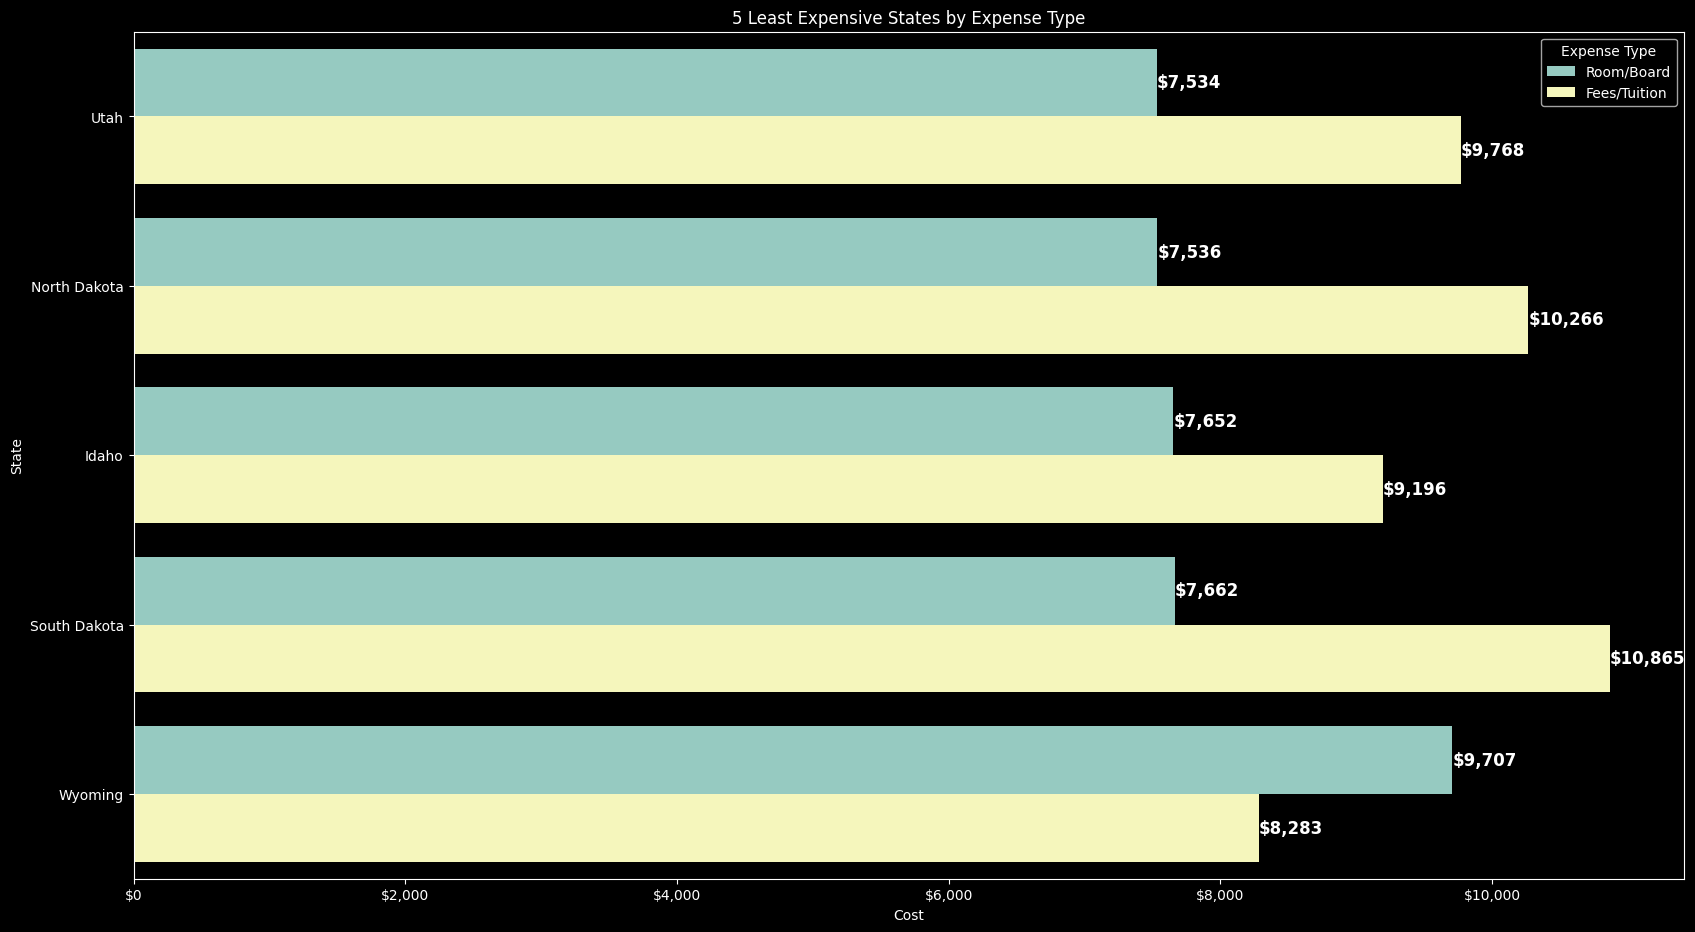

In [150]:
#plotting cheapest 5
fig, ax = plt.subplots(figsize=(20,11))
ax = sns.barplot(data = Bot5_ExpType, x = 'Value', y = 'State', hue = 'Expense')
plt.bar_label(ax.containers[1], fmt='${:,.0f}',size=12, color='white', fontweight='bold')
plt.bar_label(ax.containers[0], fmt='${:,.0f}',size=12, color='white', fontweight='bold')

plt.title('5 Least Expensive States by Expense Type')
plt.ylabel('State')
plt.xlabel('Cost')
ax.xaxis.set_major_formatter('${x:,.0f}');
plt.grid(visible=False)
plt.legend(title='Expense Type',loc='upper right');

#Models Using Original Features

#Data Validation Split

###Assigning values for Features(X) and Target(y)

In [151]:
#assign X and y 
X = df.drop(columns='Value')
y = df['Value']

###Splitting data into Training and Testing datasets

In [152]:
#splitting data into training and testing datasets (using stratify to help balance split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Create Preprocessor

In [153]:
#instantiating scaler
scaler = StandardScaler()
ohe = OneHotEncoder()

In [154]:
#create category columns
num_col = make_column_selector(dtype_include="number")
cat_col = make_column_selector(dtype_include="object")

#create column tuples
num_tup = (scaler,num_col)
cat_tup = (ohe,cat_col)

#create column transformer
processor = make_column_transformer(num_tup, cat_tup, remainder="drop")

#XGB Boost Model

##Base Model

###Instantiate and Create Model Pipeline

In [155]:
#instantiating model
xgb = XGBRegressor()

#create model pipe
xgb_pipe = make_pipeline(processor,xgb)

###Fit Model

In [156]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, b...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

###Evaluate Model

In [157]:
#evaluating model performance metrics using a function
xgb_scores = model_metrics(xgb_pipe, X_train, y_train, X_test, y_test, model_name='XGB Boost')

In [158]:
xgb_scores

,XGB Boost_test
train_MAE,427.2049
test_MAE,685.8363
train_RMSE,707.025
test_RMSE,1145.6944
train_R2,0.993514
test_R2,0.982217


###Tune Model

In [159]:
#getting hyperparameters for pipeline
xgb_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                   ('onehotencoder', OneHotEncoder(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
  ('xgbregressor',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_dep

In [160]:
#creating parameter grid to test
xgbparam_grid = { 'xgbregressor__n_estimators': [10,50,100,150],
              'xgbregressor__max_depth': ['None',2,4]}

In [161]:
#creating grid search
xgb_gs = GridSearchCV(xgb_pipe, xgbparam_grid)

In [162]:
#fitting grid search
xgb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                                       ('xgbregressor',
                                        XGBRegr...
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             param_grid={'xgbregressor__max_depth': ['None', 2, 4],
                         'xgbregressor__n_estimators': [10, 50, 100, 150]})

In [163]:
#displaying best parameters
xgb_gs.best_params_

{'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 150}

##Tuned XGBoost Model

###Instantiate and Create Model Pipeline

In [164]:
#instantiating model
tuned_xgb = XGBRegressor(max_depth=4,n_estimators=150)

#create model pipe
tuned_xgb_pipe = make_pipeline(processor,tuned_xgb)

###Fit Model

In [165]:
tuned_xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, b...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=150,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

###Evaluate Tuned Model

In [166]:
#evaluating model performance metrics using a function
tuned_xgb_scores = model_metrics(tuned_xgb_pipe, X_train, y_train, X_test, y_test, model_name='Tuned XGB Boost')

In [167]:
tuned_xgb_scores

,Tuned XGB Boost_test
train_MAE,730.8988
test_MAE,936.7147
train_RMSE,1142.3622
test_RMSE,1459.9661
train_R2,0.983066
test_R2,0.971124


> The XGBoost Model performed better prior to tuning.

#Linear Regression Model

##Base Model

###Instantiate and Create Model Pipeline

In [168]:
#instantiating model
lreg = LinearRegression()

#create model pipe
lreg_pipe = make_pipeline(processor,lreg)

###Fit Model

In [169]:
lreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('linearregression', LinearRegression())])

###Evaluate Model

In [170]:
#evaluating model performance metrics using a function
lreg_scores = model_metrics(lreg_pipe, X_train, y_train, X_test, y_test, model_name='Linear Regression')

In [171]:
lreg_scores

,Linear Regression_test
train_MAE,3829.0511
test_MAE,3753.6095
train_RMSE,4854.2783
test_RMSE,4783.6165
train_R2,0.694231
test_R2,0.689995


> This model did not perform as well as the XGBoost Model.

###Tune Model

In [172]:
#getting hyperparameters for pipeline
lreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                   ('onehotencoder', OneHotEncoder(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                 ('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)]),
 'linearregression': LinearRegression(),
 'columntransformer__n_jobs': None,
 'columntransformer

In [173]:
#creating parameter grid to test
lregparam_grid = {'linearregression__fit_intercept': [True,False],
              'linearregression__n_jobs': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'linearregression__positive':[True,False]}

In [174]:
#creating grid search
lreg_gs = GridSearchCV(lreg_pipe, lregparam_grid)

In [175]:
#fitting grid search
lreg_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__n_jobs': [0.0001, 0.001, 0.01, 0.1,
                                                      1, 10, 100, 1000],
                         'linearregression__positive': [True, False]})

In [176]:
#displaying best parameters
lreg_gs.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__n_jobs': 1,
 'linearregression__positive': False}

##Tuned Linear Regression Model

###Instantiate and Create Model Pipeline

In [177]:
#instantiating model
tuned_lreg = LinearRegression(fit_intercept=False,n_jobs=1)

#create model pipe
tuned_lreg_pipe = make_pipeline(processor,tuned_lreg)

###Fit Model

In [178]:
tuned_lreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('linearregression',
                 LinearRegression(fit_intercept=False, n_jobs=1))])

###Evaluate Tuned Model

In [179]:
#evaluating model performance metrics using a function
tuned_lreg_scores = model_metrics(tuned_lreg_pipe, X_train, y_train, X_test, y_test, model_name='Tuned Linear Regression')

In [180]:
tuned_lreg_scores

,Tuned Linear Regression_test
train_MAE,3829.0511
test_MAE,3753.6095
train_RMSE,4854.2783
test_RMSE,4783.6165
train_R2,0.694231
test_R2,0.689995


> Tuning did not improve my Linear Regression Model

In [181]:
DecisionTreeRegressor

sklearn.tree._classes.DecisionTreeRegressor

#DecisionTree Model

##Base Model

###Instantiate and Create Model Pipeline

In [182]:
#instantiating model
dt = DecisionTreeRegressor()

#create model pipe
dt_pipe = make_pipeline(processor,dt)

###Fit Model

In [183]:
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

###Evaluate Model

In [184]:
#evaluating model performance metrics using a function
dt_scores = model_metrics(dt_pipe, X_train, y_train, X_test, y_test, model_name='DecisionTree Model')

In [185]:
dt_scores

,DecisionTree Model_test
train_MAE,0.0
test_MAE,646.2221
train_RMSE,0.0
test_RMSE,1070.9455
train_R2,1.0
test_R2,0.984462


> This model did better than the XGBoost

###Tune Model

In [186]:
#getting hyperparameters for pipeline
dt_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                   ('onehotencoder', OneHotEncoder(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
  ('decisiontreeregressor', DecisionTreeRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                 ('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)]),
 'decisiontreeregressor': DecisionTreeRegressor(),
 'columntransformer__n_jobs': None,

In [187]:
#creating parameter grid to test
dtparam_grid = {'decisiontreeregressor__max_depth': ['None',3,6],
              'decisiontreeregressor__min_samples_leaf': [1,4,6,10]}

In [188]:
#creating grid search
dt_gs = GridSearchCV(dt_pipe, dtparam_grid)

In [189]:
#fitting grid search
dt_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': ['None', 3, 6],
                         'decisiontreeregressor__min_samples_leaf': [1, 4, 6,
                                                                     10]})

In [190]:
#displaying best parameters
dt_gs.best_params_

{'decisiontreeregressor__max_depth': 6,
 'decisiontreeregressor__min_samples_leaf': 1}

##Tuned DecisionTree Model

###Instantiate and Create Model Pipeline

In [191]:
#instantiating model
tuned_dt = DecisionTreeRegressor(max_depth=6,min_samples_leaf=1)

#create model pipe
tuned_dt_pipe = make_pipeline(processor,tuned_dt)

###Fit Model

In [192]:
tuned_dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=6))])

###Evaluate Tuned Model

In [193]:
#evaluating model performance metrics using a function
tuned_dt_scores = model_metrics(tuned_dt_pipe, X_train, y_train, X_test, y_test, model_name='Tuned DecisionTree Model')

In [194]:
tuned_dt_scores

,Tuned DecisionTree Model_test
train_MAE,2508.7591
test_MAE,2518.0531
train_RMSE,4045.1391
test_RMSE,4032.7687
train_R2,0.78767
test_R2,0.779676


> My model got worse after Tuning

#Models Using Feature Engineering

In [195]:
mldf.head(3)

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048


> Feature Engineering
  - I have decided to test my models by converting the states into regions.
  - Going to convert the Length column to numeric instead of OneHotEncoding it.
  - I will also create a new column containing the cost per semester by dividing the Length column by semesters (4 year/8 and 2 year/4). I will then drop the Value column and make Cost per Semester my new Target. 

In [196]:
#verifying if we have all the states plus "District of Columbia"
mldf['State'].nunique()

51

In [197]:
#Converting State Column to Region
def reg_col(state):
    if (state == 'Main'or state =='Massachusetts'or state =='Rhode Island'or state =='Connecticut'\
        or state =='New Hampshire'or state =='Vermont'or state =='New York'or state =='Pennsylvania'\
        or state =='New Jersey'):    
        return 'Northeast'  
    elif (state == 'West Virginia'or state =='Virginia'or state =='Kentucky'or state =='Tennessee'\
          or state =='North Carolina'or state =='South Carolina'or state =='Georgia'or state =='Alabama'\
          or state =='Mississippi'or state =='Arkansas'or state =='Louisiana'or state =='Florida'or\
          state =='Delaware'or state =='Maryland'or state =='District of Columbia'):
        return 'Southeast'
    elif (state == 'Minnesota'or state =='Wisconsin'or state =='Illinois'or state =='Ohio'or state =='Indiana'\
          or state =='Michigan'or state =='Missouri'or state =='Iowa'or state =='Kansas'or state =='Nebraska'\
          or state =='North Dakota'or state =='South Dakota'):
        return 'Midwest'
    elif (state == 'New Mexico'or state =='Arizona'or state =='Oklahoma'or state =='Texas'):
        return 'Southwest'
    else:    
        return 'West'

In [198]:
#applying function to convert states to regions
mldf['State'] = mldf['State'].apply(reg_col)

In [199]:
#verifying the changes were made
mldf['State'].value_counts()

Southeast    1019
Midwest       852
West          825
Northeast     568
Southwest     284
Name: State, dtype: int64

In [200]:
#renaming column
mldf.rename(columns={'State':'Region'}, inplace=True)

Converting Length column to numberic values

In [201]:
#replacing object values with numberic
mldf['Length'] = mldf['Length'].replace('4-year', 4)
mldf['Length'] = mldf['Length'].replace('2-year', 2)

In [202]:
#verifying the column datatypes
mldf.dtypes

Year        int64
Region     object
Type       object
Length      int64
Expense    object
Value       int64
dtype: object

Creating a new column for Cost per Semester

In [203]:
#filtering out all the 4-year and 2 year
ml4y = mldf[mldf['Length'] == 4]
ml2y = mldf[mldf['Length'] == 2]

In [204]:
#applying function to calculate semester cost
ml4y['Cost_Semester'] = ml4y['Value'].apply(lambda x: round(x/8,2))
ml2y['Cost_Semester'] = ml2y['Value'].apply(lambda x: round(x/4,2))

In [205]:
#verifying changes were made
ml4y.head(3)

,Year,Region,Type,Length,Expense,Value,Cost_Semester
0,2013,Southeast,Private,4,Fees/Tuition,13983,1747.88
1,2013,Southeast,Private,4,Room/Board,8503,1062.88
3,2013,Southeast,Public In-State,4,Fees/Tuition,8073,1009.12


In [206]:
#verifying changes were made
ml2y.head(3)

,Year,Region,Type,Length,Expense,Value,Cost_Semester
2,2013,Southeast,Public In-State,2,Fees/Tuition,4048,1012.0
5,2013,Southeast,Public Out-of-State,2,Fees/Tuition,7736,1934.0
10,2013,West,Public In-State,2,Fees/Tuition,3972,993.0


In [207]:
#adding the two dataframes back together with the new column
mldf = pd.concat([ml2y,ml4y])

In [208]:
mldf

,Year,Region,Type,Length,Expense,Value,Cost_Semester
2,2013,Southeast,Public In-State,2,Fees/Tuition,4048,1012.00
5,2013,Southeast,Public Out-of-State,2,Fees/Tuition,7736,1934.00
10,2013,West,Public In-State,2,Fees/Tuition,3972,993.00
13,2013,West,Public Out-of-State,2,Fees/Tuition,4150,1037.50
18,2013,Southwest,Public In-State,2,Fees/Tuition,1842,460.50
...,...,...,...,...,...,...,...
3541,2021,Midwest,Public Out-of-State,4,Fees/Tuition,26970,3371.25
3542,2021,Midwest,Public Out-of-State,4,Room/Board,9093,1136.62
3544,2021,West,Public In-State,4,Room/Board,9799,1224.88
3546,2021,West,Public Out-of-State,4,Fees/Tuition,14710,1838.75


##Exploratory Data Visualizations with New Features

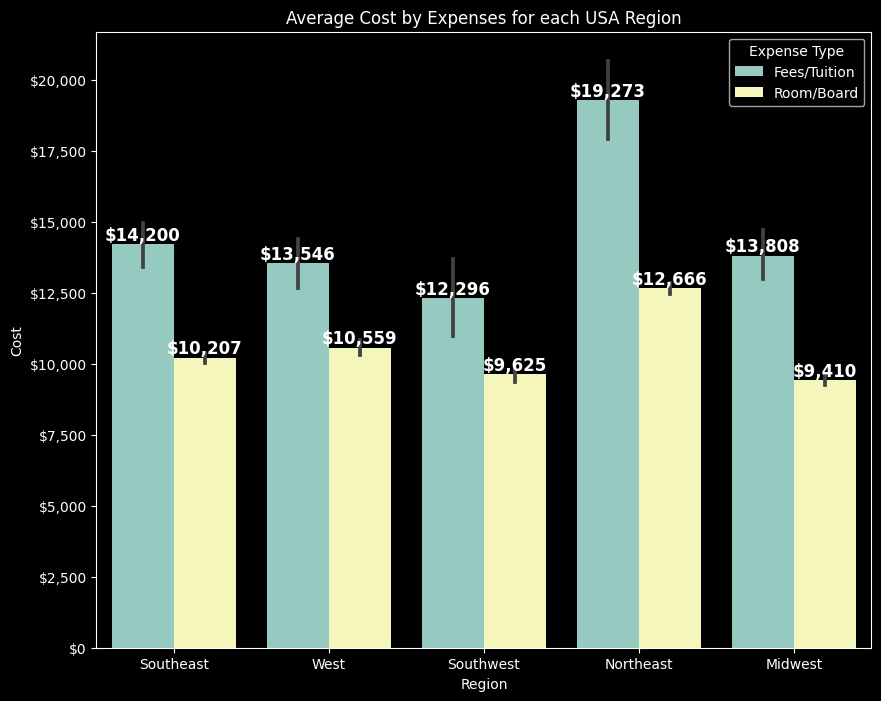

In [209]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data = mldf, x = 'Region', y = 'Value', hue = 'Expense')
plt.bar_label(ax.containers[0], fmt='${:,.0f}',size=12, color='white', fontweight='bold')
plt.bar_label(ax.containers[1], fmt='${:,.0f}',size=12, color='white', fontweight='bold')

plt.title('Average Cost by Expenses for each USA Region')
plt.ylabel('Cost')
plt.xlabel('Region')
ax.yaxis.set_major_formatter('${x:,.0f}');
plt.legend(title='Expense Type');

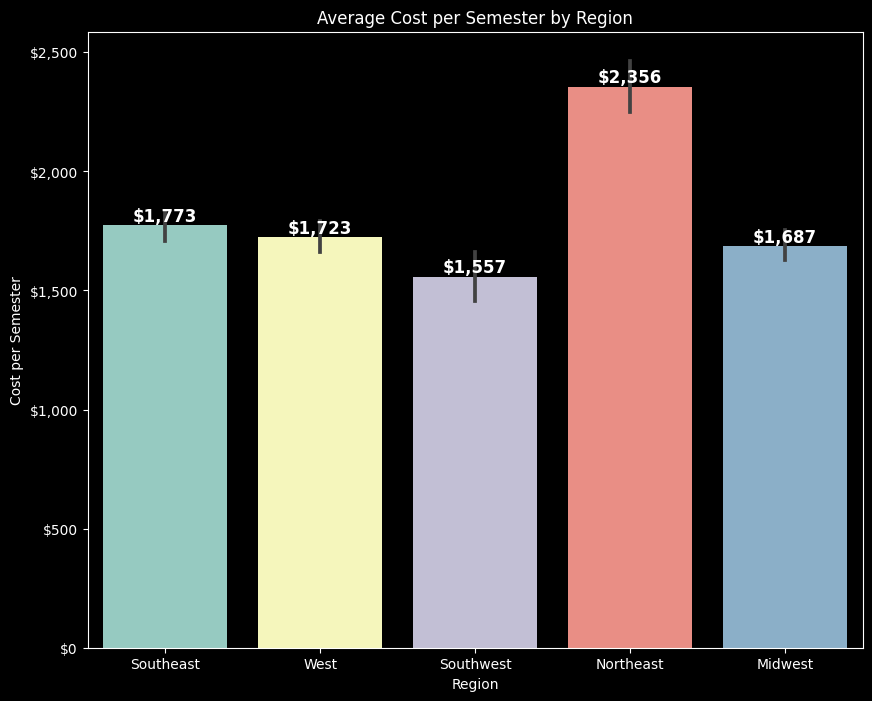

In [210]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data = mldf, x = 'Region', y = 'Cost_Semester')
plt.bar_label(ax.containers[0], fmt='${:,.0f}',size=12, color='white', fontweight='bold')

plt.title('Average Cost per Semester by Region')
plt.ylabel('Cost per Semester')
plt.xlabel('Region')
ax.yaxis.set_major_formatter('${x:,.0f}');

#Data Validation Split

###Assigning values for Features(X) and Target(y)

In [211]:
#assign X and y 
X = mldf.drop(columns=['Value','Cost_Semester'])
y = mldf['Cost_Semester']

###Splitting data into Training and Testing datasets

In [212]:
#splitting data into training and testing datasets (using stratify to help balance split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#XGB Boost Model

##Base Model

###Fit Model

In [213]:
#fitting model pipeline on new X and y train
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, b...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

###Evaluate Model

In [214]:
#evaluating model performance metrics using a function
newfeat_xgb_scores = model_metrics(xgb_pipe, X_train, y_train, X_test, y_test, model_name='New_Feat XGB Boost')

In [215]:
newfeat_xgb_scores

,New_Feat XGB Boost_test
train_MAE,305.2966
test_MAE,327.7373
train_RMSE,488.1775
test_RMSE,498.9546
train_R2,0.792089
test_R2,0.725066


###Tuning New XGB Model

In [216]:
#creating parameter grid to test
xgbparam_grid = { 'xgbregressor__n_estimators': [10,50,100,150],
              'xgbregressor__max_depth': ['None',2,4]}

In [217]:
#creating grid search
xgb_gs = GridSearchCV(xgb_pipe, xgbparam_grid)

In [218]:
#fitting grid search
xgb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                                       ('xgbregressor',
                                        XGBRegr...
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             param_grid={'xgbregressor__max_depth': ['None', 2, 4],
                         'xgbregressor__n_estimators': [10, 50, 100, 150]})

In [219]:
#displaying best parameters
xgb_gs.best_params_

{'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 150}

##Final Tuned XGBoost Model

###Instantiate and Create Model Pipeline

In [220]:
#instantiating model
tuned_xgb = XGBRegressor(max_depth=4,n_estimators=150)

#create model pipe
tuned_xgb_pipe = make_pipeline(processor,tuned_xgb)

###Fit Model

In [221]:
tuned_xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, b...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=150,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

###Evaluate Tuned Model

In [222]:
#evaluating model performance metrics using a function
newfea_tuned_xgb_scores = model_metrics(tuned_xgb_pipe, X_train, y_train, X_test, y_test, model_name='Tuned New_Feat XGB Boost')

In [223]:
newfea_tuned_xgb_scores

,Tuned New_Feat XGB Boost_test
train_MAE,306.8147
test_MAE,317.0786
train_RMSE,489.6296
test_RMSE,483.8455
train_R2,0.79085
test_R2,0.741464


#Linear Regression Model

##Base Model

###Fit Model

In [224]:
#fitting on new X and y train
lreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('linearregression', LinearRegression())])

###Evaluate Model

In [225]:
#evaluating model performance metrics using a function
new_fea_lreg_scores = model_metrics(lreg_pipe, X_train, y_train, X_test, y_test, model_name='New Feat.Linear Regression')

In [226]:
new_fea_lreg_scores

,New Feat.Linear Regression_test
train_MAE,532.6164
test_MAE,491.8675
train_RMSE,679.4282
test_RMSE,623.0811
train_R2,0.597274
test_R2,0.571258


###Tuning Model

In [227]:
#fitting grid search
lreg_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__n_jobs': [0.0001, 0.001, 0.01, 0.1,
                                                      1, 10, 100, 1000],
                         'linearregression__positive': [True, False]})

In [228]:
#displaying best parameters
lreg_gs.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__n_jobs': 1,
 'linearregression__positive': True}

##Tuned Linear Regression Model

###Instantiate and Create Model Pipeline

In [229]:
#instantiating model
tuned_lreg = LinearRegression(fit_intercept=True,n_jobs=1,positive=True)

#create model pipe
tuned_lreg_pipe = make_pipeline(processor,tuned_lreg)

###Fit Model

In [230]:
tuned_lreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('linearregression',
                 LinearRegression(n_jobs=1, positive=True))])

###Evaluate Tuned Model

In [231]:
#evaluating model performance metrics using a function
tuned_nf_lreg_scores = model_metrics(tuned_lreg_pipe, X_train, y_train, X_test, y_test, model_name='Tuned NewFeat.Linear Regression')

In [232]:
tuned_nf_lreg_scores

,Tuned NewFeat.Linear Regression_test
train_MAE,532.6212
test_MAE,491.9124
train_RMSE,679.4465
test_RMSE,623.2175
train_R2,0.597252
test_R2,0.57107


#DecisionTree Model

##Base Model

###Fit Model

In [233]:
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

###Evaluate Model

In [234]:
#evaluating model performance metrics using a function
New_Fea_dt_scores = model_metrics(dt_pipe, X_train, y_train, X_test, y_test, model_name='NewFeat DecisionTree Model')

In [235]:
New_Fea_dt_scores

,NewFeat DecisionTree Model_test
train_MAE,305.2761
test_MAE,329.0929
train_RMSE,488.1536
test_RMSE,500.5425
train_R2,0.792109
test_R2,0.723313


In [236]:
#fitting grid search
dt_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': ['None', 3, 6],
                         'decisiontreeregressor__min_samples_leaf': [1, 4, 6,
                                                                     10]})

In [237]:
#displaying best parameters
dt_gs.best_params_

{'decisiontreeregressor__max_depth': 6,
 'decisiontreeregressor__min_samples_leaf': 10}

##Tuned DecisionTree Model

###Instantiate and Create Model Pipeline

In [238]:
#instantiating model
tuned_dt = DecisionTreeRegressor(max_depth=6,min_samples_leaf=1)

#create model pipe
tuned_dt_pipe = make_pipeline(processor,tuned_dt)

###Fit Model

In [239]:
tuned_dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca76f10>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f135ca80670>)])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=6))])

###Evaluate Tuned Model

In [240]:
#evaluating model performance metrics using a function
new_fea_tuned_dt_scores = model_metrics(tuned_dt_pipe, X_train, y_train, X_test, y_test, model_name='NewFeat Tuned DecisionTree Model')

In [241]:
new_fea_tuned_dt_scores

,NewFeat Tuned DecisionTree Model_test
train_MAE,317.815
test_MAE,308.9585
train_RMSE,502.9174
test_RMSE,469.8403
train_R2,0.779344
test_R2,0.756215




---



<center>

#Overall Model Scores

</center>
<class="center" height="50">



---



##XGBoost Model Scores

In [242]:
allxgb = pd.concat([xgb_scores, tuned_xgb_scores,newfeat_xgb_scores,newfea_tuned_xgb_scores], axis=1)

In [243]:
allxgb

,XGB Boost_test,Tuned XGB Boost_test,New_Feat XGB Boost_test,Tuned New_Feat XGB Boost_test
train_MAE,427.2049,730.8988,305.2966,306.8147
test_MAE,685.8363,936.7147,327.7373,317.0786
train_RMSE,707.025,1142.3622,488.1775,489.6296
test_RMSE,1145.6944,1459.9661,498.9546,483.8455
train_R2,0.993514,0.983066,0.792089,0.79085
test_R2,0.982217,0.971124,0.725066,0.741464


##Linear Regression Model Scores

In [244]:
all_lg = pd.concat([lreg_scores, tuned_lreg_scores,new_fea_lreg_scores,tuned_nf_lreg_scores], axis=1)

In [245]:
all_lg

,Linear Regression_test,Tuned Linear Regression_test,New Feat.Linear Regression_test,Tuned NewFeat.Linear Regression_test
train_MAE,3829.0511,3829.0511,532.6164,532.6212
test_MAE,3753.6095,3753.6095,491.8675,491.9124
train_RMSE,4854.2783,4854.2783,679.4282,679.4465
test_RMSE,4783.6165,4783.6165,623.0811,623.2175
train_R2,0.694231,0.694231,0.597274,0.597252
test_R2,0.689995,0.689995,0.571258,0.57107


##DecisionTree Model Scores

In [246]:
all_dt = pd.concat([dt_scores, tuned_dt_scores,New_Fea_dt_scores,new_fea_tuned_dt_scores], axis=1)

In [247]:
all_dt

,DecisionTree Model_test,Tuned DecisionTree Model_test,NewFeat DecisionTree Model_test,NewFeat Tuned DecisionTree Model_test
train_MAE,0.0,2508.7591,305.2761,317.815
test_MAE,646.2221,2518.0531,329.0929,308.9585
train_RMSE,0.0,4045.1391,488.1536,502.9174
test_RMSE,1070.9455,4032.7687,500.5425,469.8403
train_R2,1.0,0.78767,0.792109,0.779344
test_R2,0.984462,0.779676,0.723313,0.756215


###Final Model Choice
> As a final Model I would choose the Decision Tree Model with its original columns and default model. Feature engineering and tuning did not improve the models. I could further explore more tuning options however, the DecisionTree model did best prior to tuning.
I had final R2 Test score of .9844, MAE of \$646 and RMSE of \$1071

###Recommendations

For this project we would definitely need more features to help improve the machine learning model. Some features may include:
- Modality - the format in which courses are delivered
- Scholarships - whether federal or private
- Type of Degree - whether Bachelor's, Masters, Associates, etc.
- Major - Some colleges charge more for specific majors such as Engineering or Nursing
- Cost of Living - we can see if there is any correlation between cost of living in a specific state and tuitions 
